In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

from sklearn.model_selection import train_test_split

import pickle
import gzip

In [314]:
np.random.seed(7)
%matplotlib inline

In [315]:
DIR_PATH = 'dataset/notracking/mnist/'

train_df = pd.read_csv(DIR_PATH + 'train.csv')
pred_df = pd.read_csv(DIR_PATH + 'test.csv')

train_df, test_df = train_test_split(train_df, test_size=0.2)

sub = pd.read_csv(DIR_PATH + 'sample_submission.csv')

In [316]:
def load_data():
    f = gzip.open('dataset/notracking/mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

df = load_data()

X_train = np.concatenate((df[0][0], df[1][0], df[2][0]), axis=0)
y_train = np.concatenate((df[0][1], df[1][1], df[2][1]), axis=0)

temp = pd.DataFrame({'label' : y_train})

train_df = pd.concat([temp, pd.DataFrame(X_train)], axis=1)
train_df, test_df = train_test_split(train_df, test_size=0.2)

pred_df = pd.read_csv(DIR_PATH + 'test.csv')
sub = pd.read_csv(DIR_PATH + 'sample_submission.csv')

In [317]:
def plot(dataset, index):
    k = dataset[index]
    k = k.reshape((28, 28))
    #plt.title('Label is {}'.format(training_data[1][index]))
    plt.imshow(k, cmap='gray')

In [318]:
def one_hot(j):
    # input is the target dataset of shape (1, m) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    # Look at the next block of code for a better understanding of one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [319]:
X_train = train_df.loc[:, train_df.columns != 'label'].values
y_train = one_hot(train_df['label'].values).T

X_test = test_df.loc[:, test_df.columns != 'label'].values
y_test = one_hot(test_df['label'].values).T

X_pred = pred_df.values

In [320]:
# create model
nn_model = Sequential()
nn_model.add(Dense(50, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.25))
nn_model.add(Dense(35, activation = 'relu'))
nn_model.add(Dense(21, activation = 'relu'))
nn_model.add(Dense(10, activation='softmax'))

In [321]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [322]:
nn_model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
56000/56000 [==============================] - 6s 99us/step - loss: 0.3955 - categorical_accuracy: 0.8794
Epoch 2/10
56000/56000 [==============================] - 5s 91us/step - loss: 0.2316 - categorical_accuracy: 0.9288
Epoch 3/10
56000/56000 [==============================] - 5s 91us/step - loss: 0.1987 - categorical_accuracy: 0.9391
Epoch 4/10
56000/56000 [==============================] - 5s 92us/step - loss: 0.1800 - categorical_accuracy: 0.9442
Epoch 5/10
56000/56000 [==============================] - 5s 93us/step - loss: 0.1620 - categorical_accuracy: 0.9498
Epoch 6/10
56000/56000 [==============================] - 5s 92us/step - loss: 0.1589 - categorical_accuracy: 0.9511
Epoch 7/10
56000/56000 [==============================] - 5s 94us/step - loss: 0.1481 - categorical_accuracy: 0.9540
Epoch 8/10
56000/56000 [==============================] - 5s 92us/step - loss: 0.1423 - categorical_accuracy: 0.9564
Epoch 9/10
56000/56000 [==============================] - 5s 93u

Accuracy on Training Data

In [323]:
scores_train = nn_model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_train[1]*100))

56000/56000 [==============================] - 1s 13us/step

categorical_accuracy: 98.09%


Accuracy on Test Data

In [324]:
scores_test = nn_model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (nn_model.metrics_names[1], scores_test[1]*100))

14000/14000 [==============================] - 0s 11us/step

categorical_accuracy: 96.72%


In [325]:
predictions = nn_model.predict(X_pred)
predictions = np.argmax(predictions, axis = 1)
predictions.shape

(28000,)

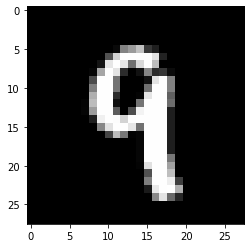

In [326]:
plot(X_test, 2)

In [327]:
sub['Label'] = predictions
sub.to_csv(DIR_PATH + "submission_1.csv", index = False)